             s   max_rss    max_vms   max_uss   max_pss     io_in  io_out  \
4405  178.5905  80698.72  128384.58  58636.25  61395.22  13304.62    0.00   
18    359.3917  80666.03  128429.50  58611.91  61376.92  13916.29    0.01   

      mean_load  contig_length  
4405        0.0          11505  
18          0.0         125313  
HG00514.sequel2.pb-clr-25.tag-h2-un


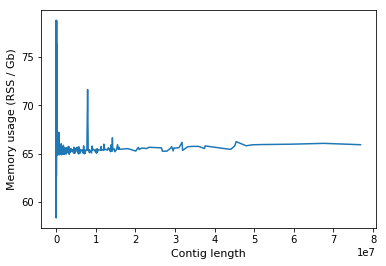

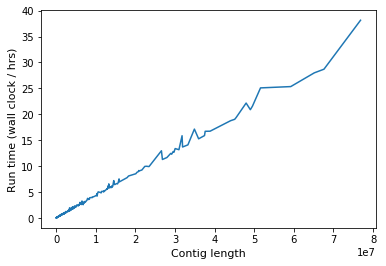

Total run time: 1404.25 hrs
Total CPU hours: 8425.5 hrs


In [17]:
%matplotlib inline

import os as os
import io as io
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
path = '/TL/deep/fhgfs/projects/pebert/cbi/diploid-assembly/run/output/assembly_polishing/contig_splits/HG00514.sequel2.pb-clr-25.tag-h2-un'

cache_path = '/TL/deep/fhgfs/projects/pebert/cbi/diploid-assembly/run/output/assembly_polishing/HG00514.sequel2.pb-clr-25.tag-h2-un.run.tsv'

if not os.path.isfile(cache_path):

    infos = []
    header = []
    for benchmark in os.listdir(path):
        if not benchmark.endswith('.rsrc'):
            continue
        full_path = os.path.join(path, benchmark)
        contig_size = benchmark.split('.')[-2].split('-')[1]
        with open(full_path, 'r') as foo:
            hd = foo.readline().strip().split('\t')
            hd = [hd[0]] + hd[2:]
            hd.append('contig_length')
            header = hd
            data = foo.readline().strip().split('\t')
            data = [data[0]] + data[2:]
            data.append(contig_size)
            infos.append(data)
    table = pd.DataFrame(infos, columns=header, dtype=str)
    table.to_csv(cache_path, sep='\t', header=True, index=False)

table = pd.read_csv(cache_path, sep='\t')
table.sort_values(['contig_length'], ascending=True, inplace=True)

print(table.loc[table['max_rss'] > 80000, :])

print(os.path.split(path)[-1])

fig, ax = plt.subplots()
ax.plot(table['contig_length'], table['max_rss'] / 1024)
ax.set_xlabel('Contig length', fontsize=11)
ax.set_ylabel('Memory usage (RSS / Gb)', fontsize=11)

fig, ax = plt.subplots()
ax.plot(table['contig_length'], table['s'] / 3600)
ax.set_xlabel('Contig length', fontsize=11)
ax.set_ylabel('Run time (wall clock / hrs)', fontsize=11)

plt.show()

ttrun = round(table['s'].sum() / 3600, 2)

print('Total run time: {} hrs'.format(ttrun))
print('Total CPU hours: {} hrs'.format(ttrun * 6))